In [6]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [7]:
# Example 3: Bank of America dataset
# Read in BOA dataset, this is original with resampling
bac = pd.read_csv(r'C:\Users\ungdu\Downloads\lab6_datamining_20521214\df_bankofamerica.csv', index_col=0, parse_dates=True)
# Convert daily data to monthly data
bac = bac.resample('M').last()
print(bac.head())

            Adj Close Price
Date                       
1990-01-31         1.542054
1990-02-28         1.687537
1990-03-31         1.469485
1990-04-30         1.441042
1990-05-31         1.525887


C:\Users\ungdu\AppData\Local\Temp\ipykernel_17908\690038841.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bac = bac.resample('M').last()


In [8]:
# Estimate Moving Average Model
# Fit an MA(1) model to the first simulated data
mod = ARIMA(bac, order=(0, 0, 1))
res = mod.fit()

In [9]:
# Print out summary information on the fit
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        Adj Close Price   No. Observations:                  358
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1154.281
Date:                Tue, 04 Jun 2024   AIC                           2314.562
Time:                        01:13:25   BIC                           2326.203
Sample:                    01-31-1990   HQIC                          2319.192
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3798      0.692     23.669      0.000      15.023      17.736
ma.L1          0.8993      0.024     38.166      0.000       0.853       0.945
sigma2        36.8181      3.570     10.315      0.0

In [10]:
# Print out the estimate for the coefficients
print(res.params)

const     16.379819
ma.L1      0.899256
sigma2    36.818147
dtype: float64


In [11]:
# Forecast Moving Average Model
# Forecast the first MA(1) model
mod = ARIMA(bac, order=(0, 0, 1))
res = mod.fit()

In [12]:

# Start the forecast 10 data points before the end of the point series at ,
# and end the forecast 10 data points after the end of the series at point
forecast = res.get_forecast(steps=120)
forecast_ci = forecast.conf_int()

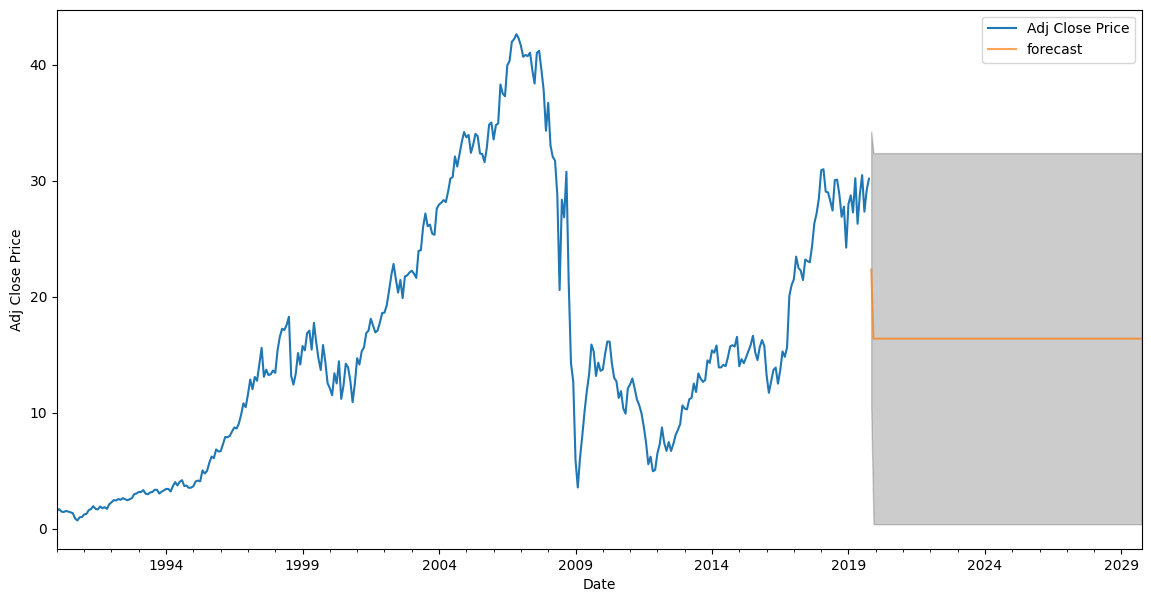

In [13]:
# Plot forecast
ax = bac.plot(label='observed')
forecast.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close Price')
plt.legend()
plt.show()